<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


*   Visualize the distribution of data.

*   Visualize the relationship between two features.

*   Visualize composition of data.

*   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [137]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2022-06-25 20:06:49--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite.33’

m4_survey_data.sqli 100%[===================>]  34.98M  34.3MB/s    in 1.0s    

2022-06-25 20:06:52 (34.3 MB/s) - ‘m4_survey_data.sqlite.33’ saved [36679680/36679680]



Connect to the database.


In [138]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pandas.api.types import is_numeric_dtype  

## Demo: How to run an sql query


In [140]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY, conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [141]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY, conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [142]:
QUERY = """
SELECT Age, COUNT(*) as count
FROM master
group by age
order by age
"""

pd.read_sql_query(QUERY, conn) 

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


## Demo: How to describe a table


In [143]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name = '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY, conn)
#print(df.iat[0,0])   #print of table fields

In [144]:
table_name = 'DatabaseWorkedWith'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name = '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY, conn)
#print(df.iat[0,0])   #print of table fields

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


In [145]:
# Get table with ConvertedComp field - master table

df = pd.read_sql_query("SELECT * FROM master", conn)
df

,index,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,...,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,Age,Trans,Dependents,SurveyLength,SurveyEase
0,0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",...,Less than once per month or monthly,Yes,"No, and I don't know what those are","No, not really",Just as welcome now as I felt last year,22.0,No,No,Appropriate in length,Easy
1,1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,...,Less than once per month or monthly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,23.0,No,No,Appropriate in length,Neither easy nor difficult
2,2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",...,Less than once per month or monthly,Yes,"No, I've heard of them, but I am not part of a...",Neutral,Somewhat more welcome now than last year,28.0,No,Yes,Appropriate in length,Easy
3,3,16,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",...,Less than once per month or monthly,Yes,"No, I've heard of them, but I am not part of a...","Yes, somewhat",Just as welcome now as I felt last year,26.0,No,No,Appropriate in length,Neither easy nor difficult
4,4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",...,A few times per week,"No, I didn't know that Stack Overflow had a jo...","No, I've heard of them, but I am not part of a...","Yes, somewhat",Just as welcome now as I felt last year,29.0,No,No,Appropriate in length,Easy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11393,11393,25136,I am a developer by profession,Yes,Never,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",...,None,"No, I knew that Stack Overflow had a job board...","No, I've heard of them, but I am not part of a...","Yes, somewhat",Just as welcome now as I felt last year,36.0,No,No,Appropriate in length,Difficult
11394,11394,25137,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Poland,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",...,I have never participated in Q&A on Stack Over...,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are",Neutral,A lot more welcome now than last year,25.0,No,No,Appropriate in length,Neither easy nor difficult
11395,11395,25138,I am a developer by profession,Yes,Less than once per year,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",...,I have never participated in Q&A on Stack Over...,Yes,"No, I've heard of them, but I am not part of a...",Neutral,A lot more welcome now than last year,34.0,No,Yes,Too long,Easy
11396,11396,25141,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of LOWER quality than prop...",Employed full-time,Switzerland,No,"Secondary school (e.g. American high school, G...",...,Daily or almost daily,Yes,"No, I've heard of them, but I am not part of a...","Yes, somewhat",Somewhat less welcome now than last year,25.0,No,No,Appropriate in length,Easy


In [146]:
# your code goes here -REPLACE WITH CODE from M3 lAB USING Y vs YHat
#WORKING CODE

"""
# matplotlib histogram - to show data distribution
bins = np.linspace(min(df['ConvertedComp']), max(df['ConvertedComp']), 13)   #div into 12 bins
plt.figure(figsize=(15, 8), edgecolor='blue')
plt.hist(df['ConvertedComp'].dropna(), color = 'blue', edgecolor = 'black', bins = int(2000000/200000))

plt.title('Distribution of Converted Salaries')
plt.xlabel('Months (Time)')
plt.ylabel('Conversion Amt.')
"""

"\n# matplotlib histogram - to show data distribution\nbins = np.linspace(min(df['ConvertedComp']), max(df['ConvertedComp']), 13)   #div into 12 bins\nplt.figure(figsize=(15, 8), edgecolor='blue')\nplt.hist(df['ConvertedComp'].dropna(), color = 'blue', edgecolor = 'black', bins = int(2000000/200000))\n\nplt.title('Distribution of Converted Salaries')\nplt.xlabel('Months (Time)')\nplt.ylabel('Conversion Amt.')\n"

Text(0, 0.5, 'Freqency Count')

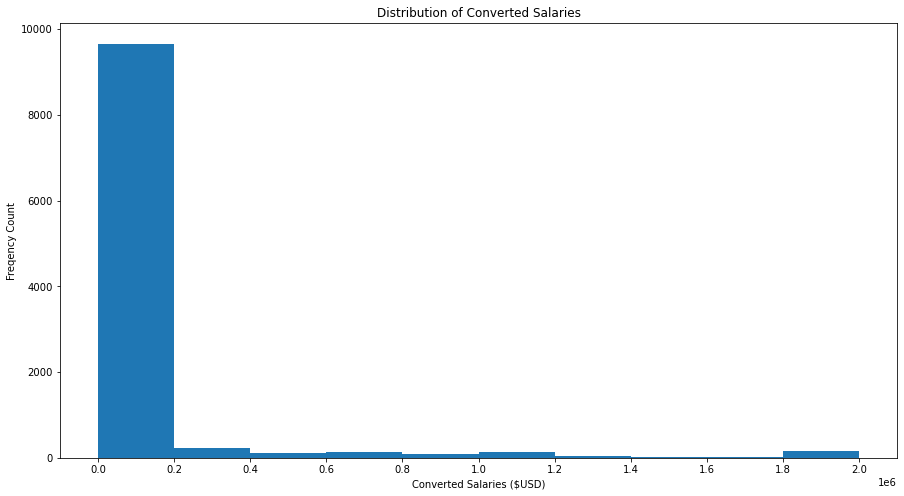

In [147]:
#  Concept from Week 2 - HISTOGRAMS - Show distribution of converted salaries

count, bin_edges = np.histogram(df['ConvertedComp'].dropna())
plt.figure(figsize=(15, 8), edgecolor='blue')
df["ConvertedComp"].plot(kind = 'hist', xticks=bin_edges)

#plt.figure(figsize=(15, 8), edgecolor='blue')
plt.title("Distribution of Converted Salaries")
plt.xlabel("Converted Salaries ($USD)")
plt.ylabel("Freqency Count")

#plt.show()

### Box Plots


Plot a box plot of `Age.`


In [148]:
df['Age'].isnull().sum()  #See if any Missing Values

287

In [149]:
# Replacement of Missing Values with Mean of AGE
if df['Age'].isnull().sum():  #See if any Missing Values
    meanAge = df['Age'].mean()
    df['Age'].replace(np.nan, meanAge, inplace=True)

In [150]:
# your code goes here - Working code 
"""
plt.figure(figsize = (18, 4))
#figure_name = plt.figure(figsize=(width, height))
plt.boxplot(x=df['Age'], vert=False)
plt.title('BoxPlot of AGE Variable')
plt.xlabel('Age')
"""

"\nplt.figure(figsize = (18, 4))\n#figure_name = plt.figure(figsize=(width, height))\nplt.boxplot(x=df['Age'], vert=False)\nplt.title('BoxPlot of AGE Variable')\nplt.xlabel('Age')\n"

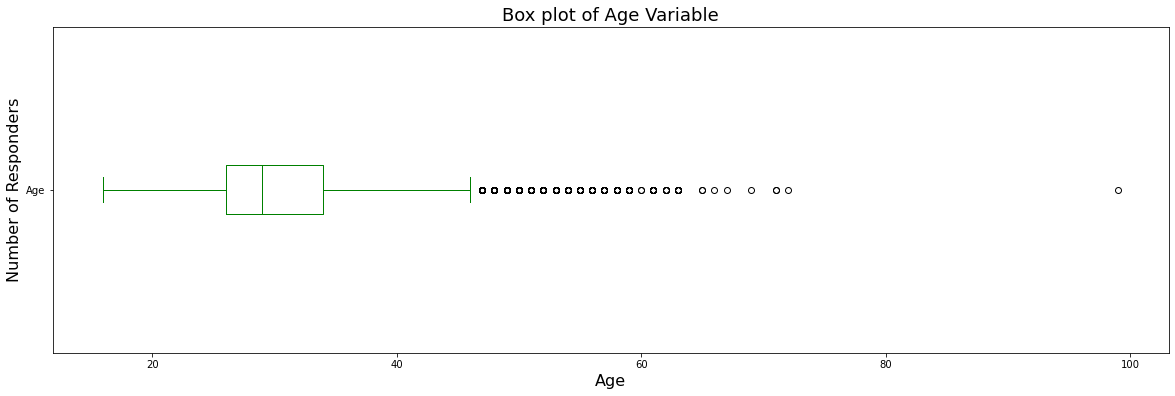

In [151]:
#Plot Boxplot
# your code goes here - Code from Lecture

df['Age'].plot(kind='box', vert=False, color='green', figsize=(20, 6))

plt.title('Box plot of Age Variable', size=18)
plt.xlabel('Age', size=16)
plt.ylabel('Number of Responders', size=16)

plt.show()

## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


In [152]:
# Getting AGE & WORKWEEKHRS from master table

QUERY = """
SELECT Age, WorkWeekHrs FROM master
"""

dfScattr = pd.read_sql_query(QUERY, conn)
dfScattr

,Age,WorkWeekHrs
0,22.0,80.0
1,23.0,32.0
2,28.0,40.0
3,26.0,40.0
4,29.0,45.0
...,...,...
11393,36.0,40.0
11394,25.0,40.0
11395,34.0,40.0
11396,25.0,42.5


In [153]:
if dfScattr['WorkWeekHrs'].isnull().sum():  #See if any Missing Values
    meanScattr = dfScattr['WorkWeekHrs'].mean()
    dfScattr['WorkWeekHrs'].replace(np.nan, meanScattr, inplace=True)
    
if dfScattr['Age'].isnull().sum():  #See if any Missing Values
    meanAge = dfScattr['Age'].mean()
    dfScattr['Age'].replace(np.nan, meanAge, inplace=True)

In [154]:
# your code goes here - WORKING CODE 
#https://matplotlib.org/stable/gallery/shapes_and_collections/scatter.html
"""
plt.figure(figsize = (16, 8))

sns.regplot(x= dfScattr['Age'], y=dfScattr['WorkWeekHrs'], data=dfScattr)
plt.ylim(0)

plt.title('Scatter Plot: Age vs WorkWeekHrs')
plt.xlabel('Age')
plt.ylabel('WorkWeekHrs')
plt.show()
"""

"\nplt.figure(figsize = (16, 8))\n\nsns.regplot(x= dfScattr['Age'], y=dfScattr['WorkWeekHrs'], data=dfScattr)\nplt.ylim(0)\n\nplt.title('Scatter Plot: Age vs WorkWeekHrs')\nplt.xlabel('Age')\nplt.ylabel('WorkWeekHrs')\nplt.show()\n"

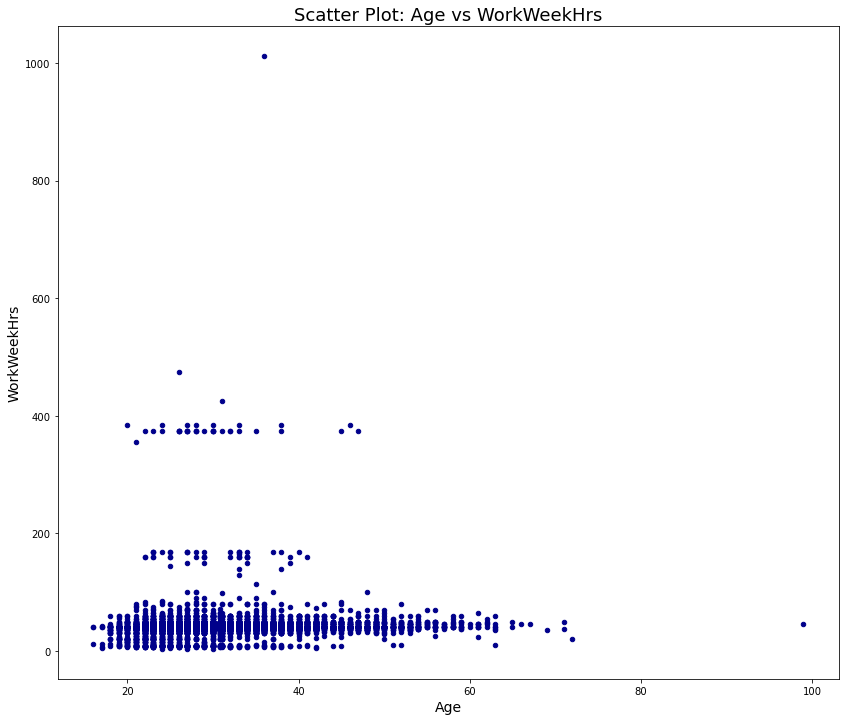

In [155]:
#Data Visualization with Python - Lecture Week 4

dfScattr.plot(kind='scatter', x='Age', y='WorkWeekHrs', figsize=(14, 12), color='darkblue')

plt.title('Scatter Plot: Age vs WorkWeekHrs', size=18)
plt.xlabel('Age', size=14)
plt.ylabel('WorkWeekHrs', size=14)
plt.show()


### Using SNS tp plot better relation between Age & WorkWeekHrs - with RegPlot

Text(0, 0.5, 'WorkWeekHrs')

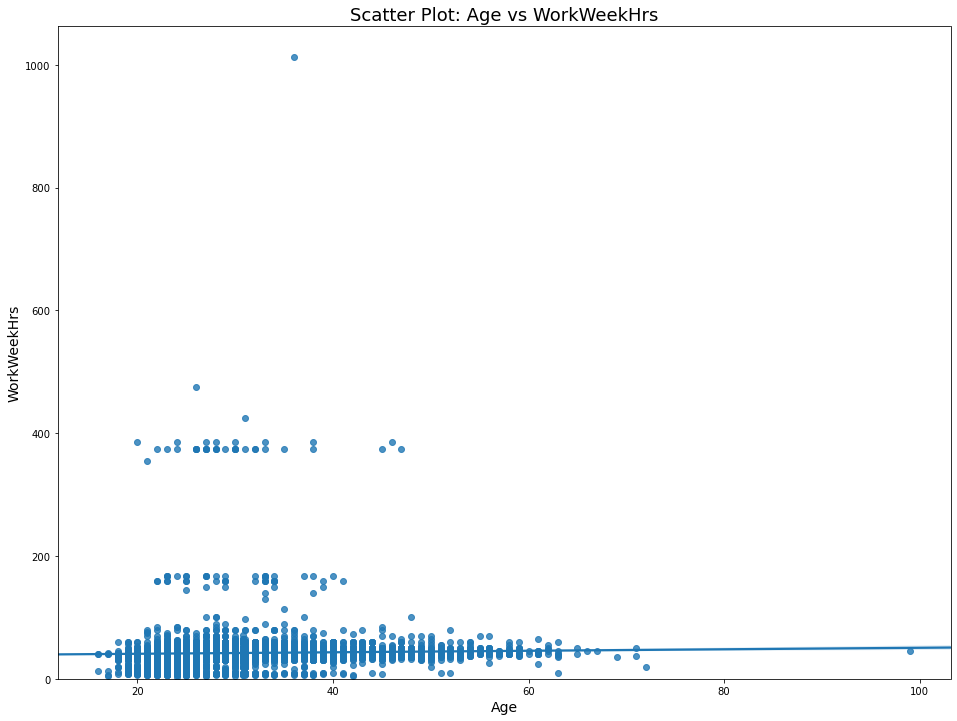

In [156]:
#Using SNS to plot relationship between Age & WeekWorkHrs

plt.figure(figsize = (16, 12))
sns.regplot(x='Age', y='WorkWeekHrs', data=dfScattr)
plt.ylim(0, )
plt.title('Scatter Plot: Age vs WorkWeekHrs', size=18)
plt.xlabel('Age', size=14)
plt.ylabel('WorkWeekHrs', size=14)

### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


In [157]:
# Get relevant data: workweekHrs, Age, CodeRevHrs

dfBubble = pd.read_sql_query("SELECT WorkWeekHrs, CodeRevHrs, Age FROM master" , conn)

In [158]:
# Single function to replace NANs for Numeric and Non-Numerical columns

"""
from pandas.api.types import is_numeric_dtype  

def ReplMissVal(x):
    
    import numpy as np
    if is_numeric_dtype(x):     #sinstance(x, np,numeric)
        mean = x.mean()
        if sum(isnull(x)) > 0:
            replcemnt = x.replace(np,nan, mean)
        else:
            pass
    else:
        mode = x.mode()
        if sum(isnull(x)) > 0:
            replcemnt = x.replace(np.nan, mode().iloc[0])
    return replcemnt
"""

'\nfrom pandas.api.types import is_numeric_dtype  \n\ndef ReplMissVal(x):\n    \n    import numpy as np\n    if is_numeric_dtype(x):     #sinstance(x, np,numeric)\n        mean = x.mean()\n        if sum(isnull(x)) > 0:\n            replcemnt = x.replace(np,nan, mean)\n        else:\n            pass\n    else:\n        mode = x.mode()\n        if sum(isnull(x)) > 0:\n            replcemnt = x.replace(np.nan, mode().iloc[0])\n    return replcemnt\n'

In [159]:
# ReplMissVal function call

"""
#df.reset_index()
ReplMissVal(df['CodeRevHrs'])
"""

"\n#df.reset_index()\nReplMissVal(df['CodeRevHrs'])\n"

In [160]:
#Examine CODEREVHRS, WORKWEEKHRS, & AGE Columns for Missing Values

if dfBubble['CodeRevHrs'].isnull().sum():  #See if any Missing Values
    meanCode = df['CodeRevHrs'].mean()
    dfBubble['CodeRevHrs'].replace(np.nan, meanCode, inplace=True)

if dfBubble['WorkWeekHrs'].isnull().sum():  #See if any Missing Values
    meanWkHrs = df['WorkWeekHrs'].mean()
    dfBubble['WorkWeekHrs'].replace(np.nan, meanWkHrs, inplace=True)

if dfBubble['Age'].isnull().sum():  #See if any Missing Values
    meanAge = dfBubble['Age'].mean()
    dfBubble['Age'].replace(np.nan, meanAge, inplace=True)

In [161]:
# Examine data distribution of dfBubble

dfBubble.describe()

,WorkWeekHrs,CodeRevHrs,Age
count,11398.000000,11398.000000,11398.000000
mean,42.064606,4.781071,30.779318
std,24.540330,4.051929,7.299993
min,3.000000,0.000000,16.000000
25%,40.000000,2.000000,26.000000
50%,40.000000,4.781071,29.000000
75%,42.500000,5.000000,34.000000
max,1012.000000,99.000000,99.000000


In [162]:
# normalize WORKWEEKHRS & CODEREVHRS Data values

NormWorkHrs = (dfBubble['WorkWeekHrs'] - dfBubble['WorkWeekHrs'].min()) / (dfBubble['WorkWeekHrs'].max() - dfBubble['WorkWeekHrs'].min())

# normalize CodeRevHrs
NormCodeHrs = (dfBubble['CodeRevHrs'] - dfBubble['CodeRevHrs'].min()) / (dfBubble['CodeRevHrs'].max() - dfBubble['CodeRevHrs'].min())


In [163]:
# Data Visualization - Lecturer Wk 4 - working Code 
"""
# WorkWeekHrs
ax0 = dfBubble.plot(kind='scatter',
                    x='Age',
                    y='WorkWeekHrs',
                    figsize=(18, 16),
                    alpha=0.5,  # transparency
                    color='green',
                    s=NormWorkHrs * 800 + 2,  # pass in weights 
                    xlim=(16, 98)
                    )

# CodeRevHrs
ax1 = dfBubble.plot(kind='scatter',
                    x='Age',
                    y='CodeRevHrs',
                    alpha=0.5,
                    color="blue",
                    s=NormCodeHrs * 800 + 2,
                    ax=ax0
                    )

ax0.set_ylabel('Respondent Time (Hours)')
ax0.set_title("Bubble Plot: WorkWeekHrs & CodeRevHrs sized by Age)", size=14)
ax0.legend(['WorkWeekHrs', 'CodeRevhrs'], loc='upper right', fontsize='medium')
"""

'\n# WorkWeekHrs\nax0 = dfBubble.plot(kind=\'scatter\',\n                    x=\'Age\',\n                    y=\'WorkWeekHrs\',\n                    figsize=(18, 16),\n                    alpha=0.5,  # transparency\n                    color=\'green\',\n                    s=NormWorkHrs * 800 + 2,  # pass in weights \n                    xlim=(16, 98)\n                    )\n\n# CodeRevHrs\nax1 = dfBubble.plot(kind=\'scatter\',\n                    x=\'Age\',\n                    y=\'CodeRevHrs\',\n                    alpha=0.5,\n                    color="blue",\n                    s=NormCodeHrs * 800 + 2,\n                    ax=ax0\n                    )\n\nax0.set_ylabel(\'Respondent Time (Hours)\')\nax0.set_title("Bubble Plot: WorkWeekHrs & CodeRevHrs sized by Age)", size=14)\nax0.legend([\'WorkWeekHrs\', \'CodeRevhrs\'], loc=\'upper right\', fontsize=\'medium\')\n'

Text(0.5, 1.0, 'Bubble Plot: WorkWeekHrs & CodeRevHrs sized by Age')

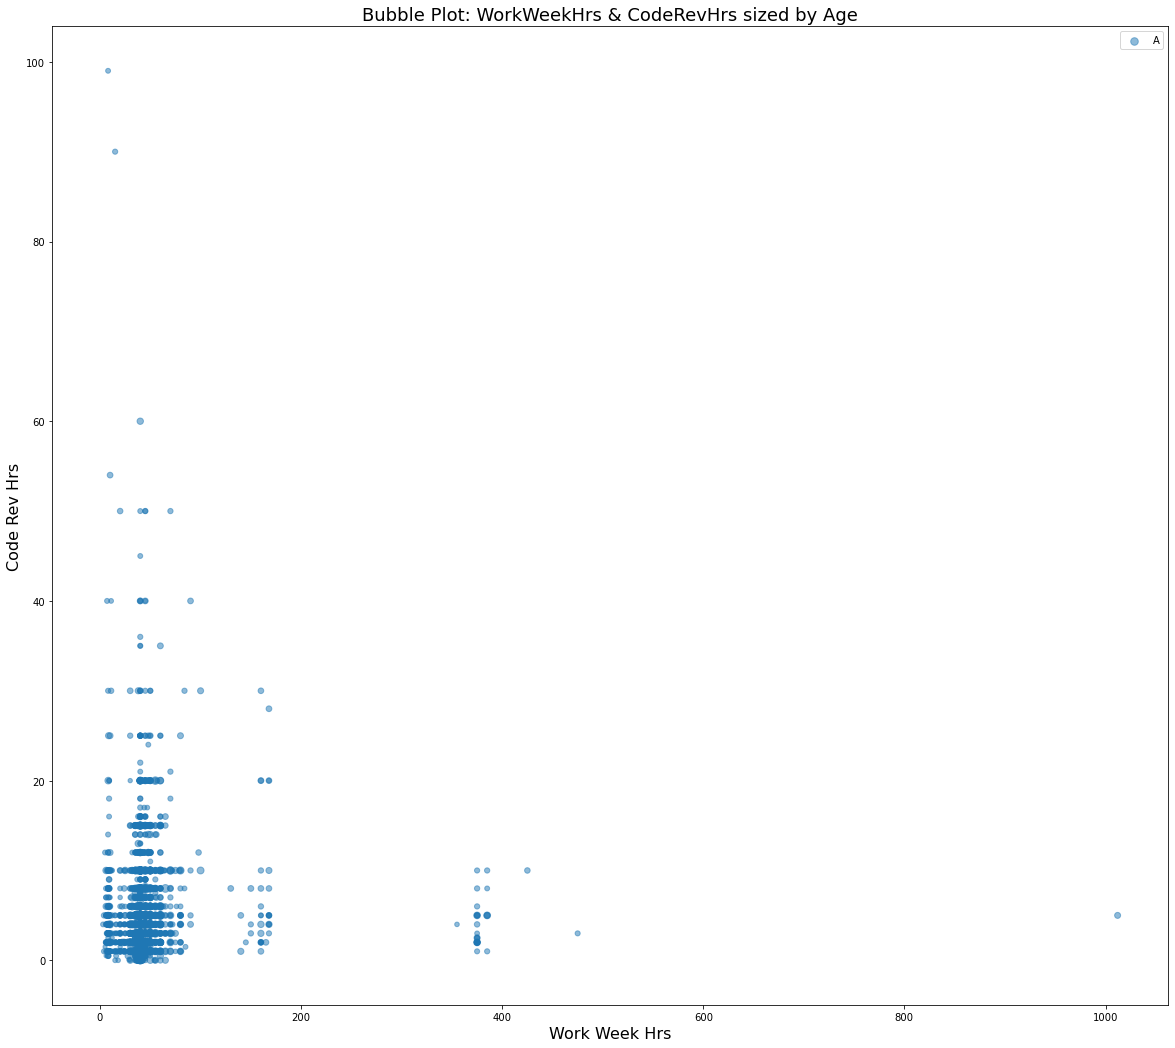

In [164]:
# your code goes here - WORKING CODE; SIMILAR CHART TO ONE ABOVE
#https://matplotlib.org/stable/gallery/shapes_and_collections/scatter.html


"""
qryBubble = pd.read_sql_query("SELECT WorkWeekHrs, CodeRevHrs, Age FROM master" , conn)

"""

qryWorkWk = pd.read_sql_query("SELECT WorkWeekHrs FROM master", conn)
qryWorkCode = pd.read_sql_query("SELECT CodeRevHrs FROM master", conn)
qryAge = pd.read_sql_query("SELECT Age FROM master", conn)

"""
WorkWeekHrs = pd.read_sql_query(qryWorkWkBubb, conn)
CodeRevHrs = pd.read_sql_query(qryWorkCodeBubb, conn)
Age = pd.read_sql_query(qryAgeBubb, conn)
"""

plt.figure(figsize=(20, 18), edgecolor='blue')
plt.scatter(x = qryWorkWk, y = qryWorkCode, s = qryAge, alpha = 0.5)

plt.xlabel('Work Week Hrs', size=16)
plt.ylabel('Code Rev Hrs', size=16)
plt.legend('Age')
plt.title("Bubble Plot: WorkWeekHrs & CodeRevHrs sized by Age", size=18)


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


### Data Retrieval for Bar Chart: Current Top 5 Languages 

In [165]:
table_Name = 'LanguageWorkedWith'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_Name)

dfLang = pd.read_sql_query(QUERY, conn)
#print(dfLang.iat[0,0])

QUERY2 = """
SELECT LanguageWorkedWith, count(LanguageWorkedWith) as cntLang FROM LanguageWorkedWith
group by LanguageWorkedWith
order by cntLang DESC
LIMIT 5
"""

dfCurrLang = pd.read_sql_query(QUERY2, conn)
dfCurrLang

,LanguageWorkedWith,cntLang
0,JavaScript,8687
1,HTML/CSS,7830
2,SQL,7106
3,Bash/Shell/PowerShell,4642
4,Python,4542


In [166]:
table_Name = 'LanguageWorkedWith'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_Name)

dfLang = pd.read_sql_query(QUERY, conn)
#print(dfLang.iat[0,0])

QUERY3 = """
SELECT LanguageWorkedWith, count(LanguageWorkedWith) as cntLang FROM LanguageWorkedWith
group by LanguageWorkedWith
order by cntLang DESC
"""

dfCurrLang = pd.read_sql_query(QUERY3, conn)
dfCurrLang

,LanguageWorkedWith,cntLang
0,JavaScript,8687
1,HTML/CSS,7830
2,SQL,7106
3,Bash/Shell/PowerShell,4642
4,Python,4542
5,Java,4506
6,C#,4288
7,TypeScript,3232
8,PHP,2913
9,C++,1946


In [167]:
table_Name = 'LanguageDesireNextYear'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_Name)

dfLang = pd.read_sql_query(QUERY, conn)
#print(dfLang.iat[0,0])

QUERY2 = """
SELECT LanguageDesireNextYear, count(LanguageDesireNextYear) as cntLang FROM LanguageDesireNextYear
group by LanguageDesireNextYear
order by cntLang DESC
LIMIT 5
"""

dfFutLang = pd.read_sql_query(QUERY2, conn)
dfFutLang

,LanguageDesireNextYear,cntLang
0,JavaScript,6630
1,HTML/CSS,5328
2,Python,5239
3,SQL,5012
4,TypeScript,4088


In [168]:
table_Name = 'LanguageDesireNextYear'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_Name)

dfLang = pd.read_sql_query(QUERY, conn)
#print(dfLang.iat[0,0])

QUERY4 = """
SELECT LanguageDesireNextYear, count(LanguageDesireNextYear) as cntLang FROM LanguageDesireNextYear
group by LanguageDesireNextYear
order by cntLang DESC
"""

dfFutLang = pd.read_sql_query(QUERY4, conn)
dfFutLang

,LanguageDesireNextYear,cntLang
0,JavaScript,6630
1,HTML/CSS,5328
2,Python,5239
3,SQL,5012
4,TypeScript,4088
5,C#,3591
6,Bash/Shell/PowerShell,3097
7,Java,2953
8,Go,2759
9,Kotlin,1890


In [169]:
#SELECT DatabaseWorkedWith from DatabaseWorkedWith

In [170]:
QUERY="""
SELECT distinct(DatabaseWorkedWith), count(DatabaseWorkedWith) as cntDB \
FROM DatabaseWorkedWith \
group by DatabaseWorkedWith \
order by cntDB DESC
LIMIT 5
"""

dfCurrDB = pd.read_sql_query(QUERY,conn)
dfCurrDB

,DatabaseWorkedWith,cntDB
0,MySQL,5469
1,Microsoft SQL Server,4110
2,PostgreSQL,4097
3,SQLite,3248
4,MongoDB,3016


In [171]:
QUERY="""
SELECT distinct(DatabaseWorkedWith), count(DatabaseWorkedWith) as cntDB \
FROM DatabaseWorkedWith \
group by DatabaseWorkedWith \
order by cntDB DESC
"""

dfCurrDB = pd.read_sql_query(QUERY,conn)
dfCurrDB

,DatabaseWorkedWith,cntDB
0,MySQL,5469
1,Microsoft SQL Server,4110
2,PostgreSQL,4097
3,SQLite,3248
4,MongoDB,3016
5,Redis,2508
6,Elasticsearch,1954
7,Oracle,1744
8,MariaDB,1709
9,Firebase,1314


In [172]:
table_Name = 'DatabaseDesireNextYear'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_Name)

dfFutDB = pd.read_sql_query(QUERY, conn)

#print(dfFutDB.iat[0,0])

In [173]:
dfFutDB

,sql
0,"CREATE TABLE ""DatabaseDesireNextYear"" (\n""Resp..."


In [174]:
table_Name = 'DatabaseDesireNextYear'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_Name)

dfFutDB = pd.read_sql_query(QUERY, conn)
print(dfFutDB.iat[0,0])

CREATE TABLE "DatabaseDesireNextYear" (
"Respondent" INTEGER,
  "DatabaseDesireNextYear" TEXT
)


In [175]:
"""
dfFutDB = pd.read_sql_query("SELECT * FROM DatabaseDesireNextYear", conn)
dfFutDB
"""

'\ndfFutDB = pd.read_sql_query("SELECT * FROM DatabaseDesireNextYear", conn)\ndfFutDB\n'

In [176]:
QUERY = """ 
SELECT DatabaseDesireNextYear, count(DatabaseDesireNextYear) as cntDB from DatabaseDesireNextYear
group by DatabaseDesireNextYear
order by cntDB DESC
LIMIT 5
"""

dfFutDB = pd.read_sql_query(QUERY, conn)
dfFutDB


,DatabaseDesireNextYear,cntDB
0,PostgreSQL,4328
1,MongoDB,3649
2,Redis,3331
3,MySQL,3281
4,Elasticsearch,2856


In [177]:
dfFutDB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   DatabaseDesireNextYear  5 non-null      object
 1   cntDB                   5 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 208.0+ bytes


In [178]:
#df['DatabaseWorkedWith'].value_counts()
#dfDB.reset_index('DatabaseWorkedWith', inplace=True, drop=True)

dfFutDB.set_index('DatabaseDesireNextYear')
labels = dfFutDB['DatabaseDesireNextYear']     #Extract labels
data = dfFutDB['cntDB']

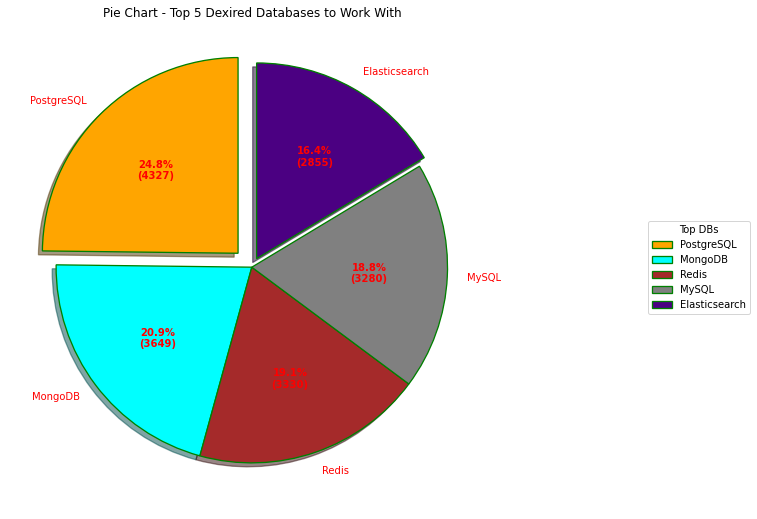

In [179]:
# your code goes here
#https://www.geeksforgeeks.org/plot-a-pie-chart-in-python-using-matplotlib/

# Creating dataset
labels = dfFutDB['DatabaseDesireNextYear']
data = dfFutDB['cntDB']
 
# Creating explode data
explode = (0.1, 0.0, 0.0, 0.0, 0.05)   #Must be same length as x (data)
 
# Creating color parameters
colors = ( "orange", "cyan", "brown", "grey", "indigo")
 
# Wedge properties
wp = { 'linewidth' : 1.3, 'edgecolor' : "green" }
 
# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)
 
# Creating plot
fig, ax = plt.subplots(figsize =(12, 9))
wedges, texts, autotexts = ax.pie(data,
                                  autopct = lambda pct: func(pct, data),
                                  explode = explode,
                                  labels = labels,  
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color="red"))
 
# Adding legend
ax.legend(wedges, labels,
          title ="Top DBs",
          loc ="center left",
          bbox_to_anchor =(1.3, 0, 0.5, 1))

plt.setp(autotexts, size = 10, weight ="bold")
ax.set_title("Pie Chart - Top 5 Dexired Databases to Work With")
 
# show plot
plt.show()


### Query to get ALL Values from DatabaseDesireNext Year for Analysis Writeup

In [180]:
QUERY = """ 
SELECT DatabaseDesireNextYear, count(DatabaseDesireNextYear) as cntDB from DatabaseDesireNextYear
group by DatabaseDesireNextYear
order by cntDB DESC
"""

dfFutDB = pd.read_sql_query(QUERY, conn)
dfFutDB


,DatabaseDesireNextYear,cntDB
0,PostgreSQL,4328
1,MongoDB,3649
2,Redis,3331
3,MySQL,3281
4,Elasticsearch,2856
5,Microsoft SQL Server,2706
6,SQLite,2437
7,Firebase,1650
8,MariaDB,1385
9,DynamoDB,1044


### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


In [181]:
# your code goes here

QUERY = """
SELECT Age, WorkWeekHrs, CodeRevHrs FROM master
where Age between 30 and 35
order by Age DESC
"""

qryStkChrt = pd.read_sql_query(QUERY, conn)
#qryStkChrt


In [182]:
#  Replacing nan values in AGE Column

#qryStkChrt.set_index(['WorkWeekHrs'])

if qryStkChrt['Age'].isnull().sum() > 0:
    meanAge = qryStkChrt['Age'].mean()
    qryStkChrt['Age'] = qryStkChrt['Age'].fillna(meanAge)
    
if qryStkChrt['WorkWeekHrs'].isnull().sum() > 0:
    meanWork = qryStkChrt['WorkWeekHrs'].mean()
    qryStkChrt['WorkWeekHrs'] = qryStkChrt['WorkWeekHrs'].fillna(meanWork)

if qryStkChrt['CodeRevHrs'].isnull().sum() > 0:
    meanCode = qryStkChrt['CodeRevHrs'].mean()
    qryStkChrt['CodeRevHrs'] = qryStkChrt['CodeRevHrs'].fillna(meanCode)

"""
medCodekHrs = qrydf['CodeRevHrs'].median()
qrydf['CodeRevHrs'] = df['CodeRevHrs'].fillna(medCodeHrs)
"""

"\nmedCodekHrs = qrydf['CodeRevHrs'].median()\nqrydf['CodeRevHrs'] = df['CodeRevHrs'].fillna(medCodeHrs)\n"

In [183]:
#Using Python to Groupby

qryStkChrt2 = qryStkChrt[['WorkWeekHrs', 'CodeRevHrs', 'Age']]
qryStkChrt3 = qryStkChrt2.groupby(['Age'], as_index=False).median()
qryStkChrt3
                          

,Age,WorkWeekHrs,CodeRevHrs
0,30.0,40.0,4.784443
1,31.0,40.0,4.784443
2,32.0,40.0,4.784443
3,33.0,40.0,4.000000
4,34.0,40.0,4.784443
5,35.0,40.0,4.784443


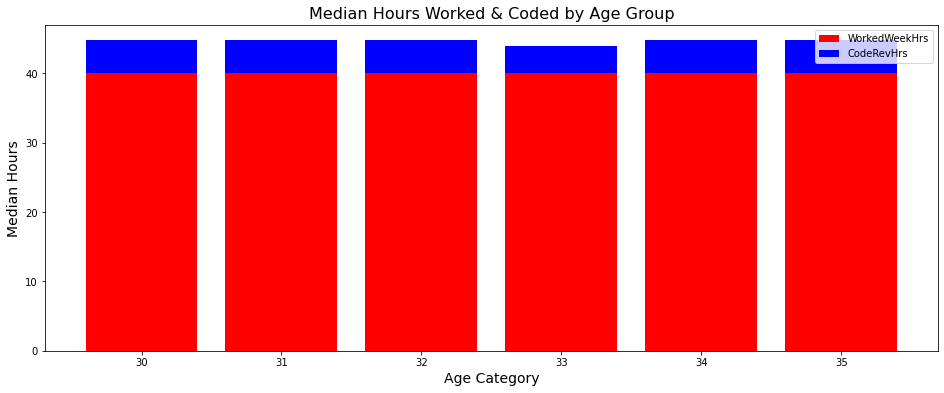

In [184]:
# https://www.geeksforgeeks.org/create-a-stacked-bar-plot-in-matplotlib/
#

x = qryStkChrt3['Age']     #['A', 'B', 'C', 'D']
y1 = qryStkChrt3['WorkWeekHrs']     #np.array([10, 20, 10, 30])
y2 = qryStkChrt3['CodeRevHrs']     #np.array([20, 25, 15, 25])
  

plt.figure(figsize=(16, 6))

# plot bars in stack manner
plt.bar(x, y1, color='r')
plt.bar(x, y2, bottom=y1, color='b')

plt.xlabel("Age Category", size=14)
plt.ylabel("Median Hours", size=14)
plt.legend(["WorkedWeekHrs", "CodeRevHrs"])
plt.title("Median Hours Worked & Coded by Age Group", size=16)
plt.show()

### Analyzing WorkWeekHrs & CodeRevHrs by Age for Older Techs

In [185]:
QUERY = """
SELECT Age, WorkWeekHrs, CodeRevHrs FROM master
order by Age DESC
"""

qryStkChrt = pd.read_sql_query(QUERY, conn)
qryStkChrt

,Age,WorkWeekHrs,CodeRevHrs
0,99.0,45.0,8.0
1,72.0,20.0,NaN
2,71.0,37.0,3.0
3,71.0,50.0,3.0
4,69.0,36.0,5.0
...,...,...,...
11393,NaN,50.0,5.0
11394,NaN,40.0,NaN
11395,NaN,65.0,7.0
11396,NaN,35.0,4.0


In [186]:
#  Replacing nan values in AGE Column

#qryStkChrt.set_index(['WorkWeekHrs'])

if qryStkChrt['Age'].isnull().sum() > 0:
    meanAge = qryStkChrt['Age'].mean()
    qryStkChrt['Age'] = qryStkChrt['Age'].fillna(meanAge)
    
if qryStkChrt['WorkWeekHrs'].isnull().sum() > 0:
    meanWork = qryStkChrt['WorkWeekHrs'].mean()
    qryStkChrt['WorkWeekHrs'] = qryStkChrt['WorkWeekHrs'].fillna(meanWork)

if qryStkChrt['CodeRevHrs'].isnull().sum() > 0:
    meanCode = qryStkChrt['CodeRevHrs'].mean()
    qryStkChrt['CodeRevHrs'] = qryStkChrt['CodeRevHrs'].fillna(meanCode)

"""
medCodekHrs = qrydf['CodeRevHrs'].median()
qrydf['CodeRevHrs'] = df['CodeRevHrs'].fillna(medCodeHrs)
"""

"\nmedCodekHrs = qrydf['CodeRevHrs'].median()\nqrydf['CodeRevHrs'] = df['CodeRevHrs'].fillna(medCodeHrs)\n"

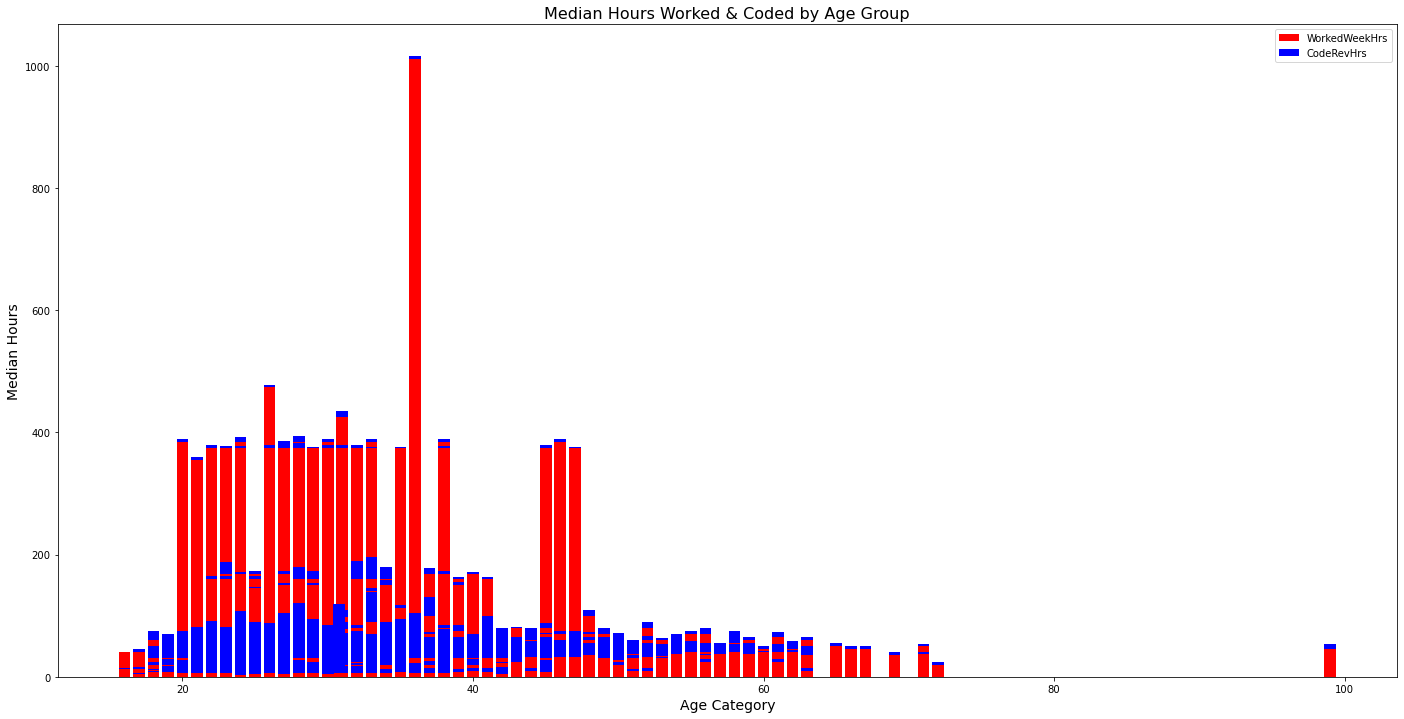

In [187]:
# https://www.geeksforgeeks.org/create-a-stacked-bar-plot-in-matplotlib/
#

x = qryStkChrt['Age']     #['A', 'B', 'C', 'D']
y1 = qryStkChrt['WorkWeekHrs']     #np.array([10, 20, 10, 30])
y2 = qryStkChrt['CodeRevHrs']     #np.array([20, 25, 15, 25])
  

plt.figure(figsize=(24, 12))

# plot bars in stack manner
plt.bar(x, y1, color='r')
plt.bar(x, y2, bottom=y1, color='b')

plt.xlabel("Age Category", size=14)
plt.ylabel("Median Hours", size=14)
plt.legend(["WorkedWeekHrs", "CodeRevHrs"])
plt.title("Median Hours Worked & Coded by Age Group", size=16)
plt.show()

## Visualizing comparison of data


### Line Chart



Plot the median `ConvertedComp` for all ages from 45 to 60.


In [188]:
# your code goes here
QUERY = """
Select ConvertedComp, Age from master
where Age between 45 and 60
order by Age
"""

qryLnChrt = pd.read_sql_query(QUERY, conn)
qryLnChrt

,ConvertedComp,Age
0,72522.0,45.0
1,54876.0,45.0
2,185000.0,45.0
3,165000.0,45.0
4,130000.0,45.0
...,...,...
594,72530.0,59.0
595,160000.0,59.0
596,2000000.0,59.0
597,150000.0,60.0


In [189]:
#  Replacing nan values in AGE Column

#qryStkChrt.set_index(['WorkWeekHrs'])

if qryLnChrt['ConvertedComp'].isnull().sum() > 0:
    meanConv = qryLnChrt['ConvertedComp'].mean()
    qryLnChrt['ConvertedComp'] = qryLnChrt['ConvertedComp'].fillna(meanConv)

if qryLnChrt['Age'].isnull().sum() > 0:
    meanAge = qryLnChrt['Age'].mean()
    qryLnChrt['Age'] = qryLnChrt['Age'].fillna(meanAge)


In [190]:
# your code goes here Ages 25 - 35:  Used for Lab Responses

"""
QUERY =
Select ConvertedComp, Age from master
where Age between 25 and 35
order by Age
"""

"""
qryLnChrt = pd.read_sql_query(QUERY, conn)
qryLnChrt
"""

'\nqryLnChrt = pd.read_sql_query(QUERY, conn)\nqryLnChrt\n'

In [191]:
# Find MEDIAN for ConvertedComp by Age

qrydf_LnChrt = qryLnChrt[['Age', 'ConvertedComp']]
qrydf_LnChrt2 = qrydf_LnChrt.groupby(['Age'], as_index=False).median()
qrydf_LnChrt2


,Age,ConvertedComp
0,45.0,94210.0
1,46.0,103500.0
2,47.0,93746.0
3,48.0,108250.0
4,49.0,89520.0
5,50.0,95000.0
6,51.0,108423.0
7,52.0,106044.0
8,53.0,107754.5
9,54.0,122000.0


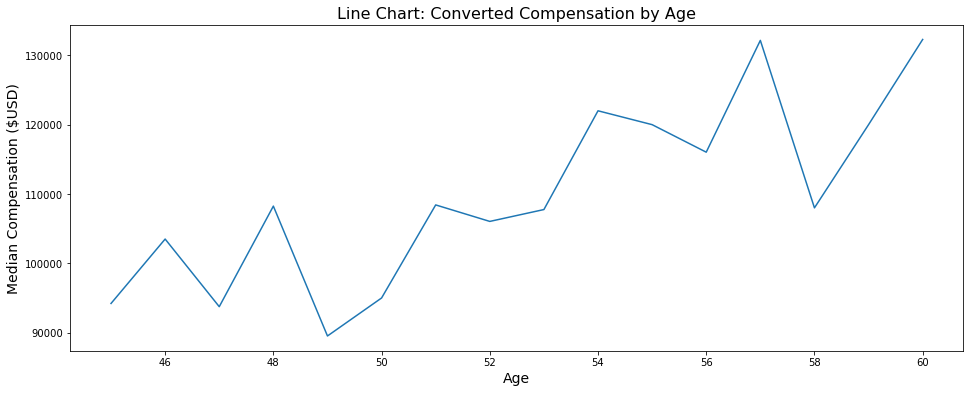

In [192]:
#PLOTTING LINE CHART
#https://www.geeksforgeeks.org/line-chart-in-matplotlib-python/

plt.figure(figsize=(16, 6))
plt.plot(qrydf_LnChrt2['Age'], qrydf_LnChrt2['ConvertedComp'])
plt.xlabel("Age", size=14)  # add X-axis label
plt.ylabel("Median Compensation ($USD)", size=14)  # add Y-axis label
plt.title("Line Chart: Converted Compensation by Age", size=16)  # add title
plt.show()

In [193]:
"""qrydf_LnChrt2['ConvertedComp'].plot(kind='line', figsize=(16, 6)) # add to subplot 2

#plt.plot(qrydf_LnChrt2['Age'], qrydf_LnChrt2['ConvertedComp'])
plt.xlabel("Age")  # add X-axis label
plt.ylabel("Converted Comp Median")  # add Y-axis label
plt.title("Line Chart: Age vs Converted Comp")  # add title
plt.show()"""


'qrydf_LnChrt2[\'ConvertedComp\'].plot(kind=\'line\', figsize=(16, 6)) # add to subplot 2\n\n#plt.plot(qrydf_LnChrt2[\'Age\'], qrydf_LnChrt2[\'ConvertedComp\'])\nplt.xlabel("Age")  # add X-axis label\nplt.ylabel("Converted Comp Median")  # add Y-axis label\nplt.title("Line Chart: Age vs Converted Comp")  # add title\nplt.show()'

### Bar Chart


#### Create a horizontal bar chart using column `MainBranch.`


In [194]:
#Get Distince MainBranch Values

QUERY = """
SELECT MainBranch, count(MainBranch) as cntBranch from master
group by MainBranch
order by MainBranch
"""

qryBrnch = pd.read_sql_query(QUERY, conn)
qryBrnch

#df['DatabaseW.value_counts()

,MainBranch,cntBranch
0,I am a developer by profession,10618
1,"I am not primarily a developer, but I write co...",780


In [195]:
#  Replacing nan values in MainBranch Col with Most Frequent Value

if qryBrnch['MainBranch'].isnull().sum() > 0:
    modeBrnch = qryBrnch['MainBranch'],mode().iloc[0]
    qryBrnch['MainBranch'] = qryBrnch['MainBranch'].fillna(modeBrnch)

In [196]:
# Need to Normalize MainBranch field - Non-coders are outweighted

qryBrnch['cntBranch'] = (qryBrnch['cntBranch'] - qryBrnch['cntBranch'].min()) / (qryBrnch['cntBranch'].max() - qryBrnch['cntBranch'].min())
qryBrnch

,MainBranch,cntBranch
0,I am a developer by profession,1.0
1,"I am not primarily a developer, but I write co...",0.0


In [197]:
#  Remove Default Index column

qryBrnch.set_index("MainBranch", drop=False, inplace=True)

In [198]:
qryBrnch.dtypes

MainBranch     object
cntBranch     float64
dtype: object

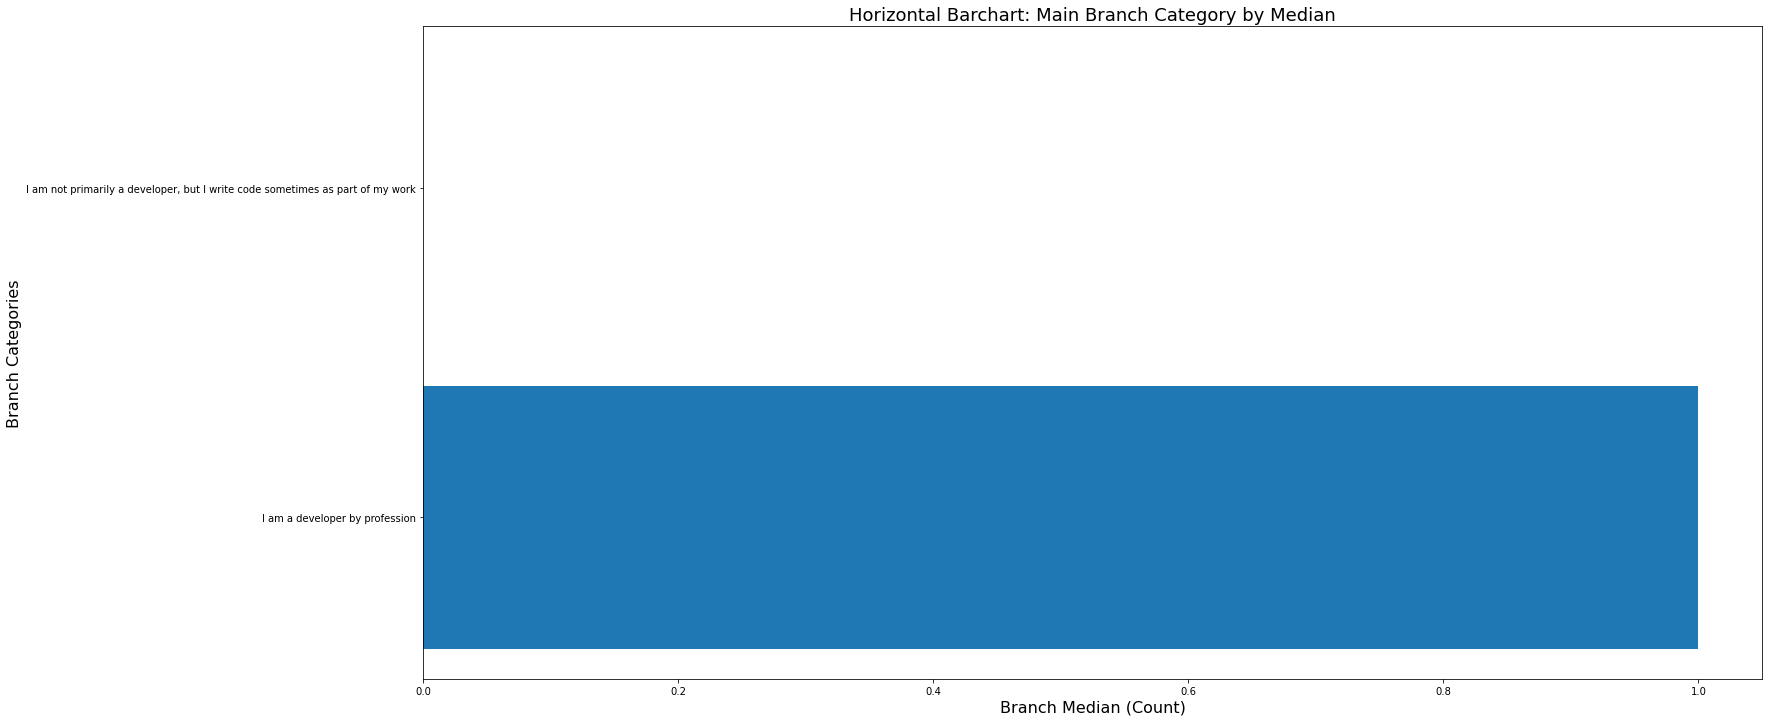

In [199]:
# your code goes here
#https://www.geeksforgeeks.org/bar-plot-in-matplotlib/

brnch = qryBrnch['MainBranch']
cnt = qryBrnch['cntBranch']

# Figure Size
plt.figure(figsize=(24, 12))

# Horizontal Bar Plot
plt.barh(brnch, cnt)   

plt.ylabel("Branch Categories", size=16)  # add X-axis label
plt.xlabel("Branch Median (Count)", size=16)  # add Y-axis label
plt.title("Horizontal Barchart: Main Branch Category by Median", size=18)  # add title

# Show Plot
plt.show()



In [200]:
"""
cntBrnch = list(map(str, range(0, 10000)))

qryBrnch["MainBranch"].plot(kind = 'barh')

# Figure Size
plt.figure(figsize=(16, 8))

# Horizontal Bar Plot
#plt.barh(brnch, cnt)   

plt.ylabel("Main Branch Categories")  # add X-axis label
plt.xlabel("Main Branch Median (Count)")  # add Y-axis label
plt.title("Horizontal Barchart: Main Branch Category Median")  # add title

# Show Plot
plt.show()
"""

'\ncntBrnch = list(map(str, range(0, 10000)))\n\nqryBrnch["MainBranch"].plot(kind = \'barh\')\n\n# Figure Size\nplt.figure(figsize=(16, 8))\n\n# Horizontal Bar Plot\n#plt.barh(brnch, cnt)   \n\nplt.ylabel("Main Branch Categories")  # add X-axis label\nplt.xlabel("Main Branch Median (Count)")  # add Y-axis label\nplt.title("Horizontal Barchart: Main Branch Category Median")  # add title\n\n# Show Plot\nplt.show()\n'

In [201]:
# Get Distinct DevType values for Lab Responses

QUERY = """
SELECT distinct(DevType), count(Respondent) as cnt from DevType
group by DevType
order by cnt DESC
"""

qryBrnch = pd.read_sql_query(QUERY, conn)
qryBrnch

#df['DatabaseW.value_counts()

,DevType,cnt
0,"Developer, full-stack",6928
1,"Developer, back-end",6290
2,"Developer, front-end",3920
3,"Developer, desktop or enterprise applications",2575
4,"Developer, mobile",1959
5,DevOps specialist,1639
6,Database administrator,1413
7,System administrator,1202
8,Designer,988
9,"Developer, QA or test",911


### HEAT MAP ANOTHER CORRELATION VIEW



In [ ]:
#Re-Code Gender to 0 and 1
Man = 0, Woman =1

In [216]:
# your code goes here
QUERY = """
Select ConvertedComp, WorkWeekHrs, CodeRevHrs, Age, Gender from master
order by Age
"""

qryHeat = pd.read_sql_query(QUERY, conn)
qryHeat

,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
0,17280.0,45.0,5.0,NaN
1,NaN,45.0,NaN,NaN
2,68745.0,40.0,2.0,NaN
3,80202.0,40.0,5.0,NaN
4,22388.0,40.0,2.0,NaN
...,...,...,...,...
11393,165000.0,36.0,5.0,69.0
11394,NaN,37.0,3.0,71.0
11395,175000.0,50.0,3.0,71.0
11396,96000.0,20.0,NaN,72.0


In [217]:
#  Replacing nan values in AGE Column

#qryStkChrt.set_index(['WorkWeekHrs'])

if qryHeat['Age'].isnull().sum() > 0:
    meanAge = qryHeat['Age'].mean()
    qryHeat['Age'] = qryHeat['Age'].fillna(meanAge)
    
if qryHeat['WorkWeekHrs'].isnull().sum() > 0:
    meanWork = qryHeat['WorkWeekHrs'].mean()
    qryHeat['WorkWeekHrs'] = qryHeat['WorkWeekHrs'].fillna(meanWork)

if qryHeat['CodeRevHrs'].isnull().sum() > 0:
    meanCode = qryHeat['CodeRevHrs'].mean()
    qryHeat['CodeRevHrs'] = qryHeat['CodeRevHrs'].fillna(meanCode)

if qryHeat['ConvertedComp'].isnull().sum() > 0:
    meanComp = qryHeat['ConvertedComp'].mean()
    qryHeat['ConvertedComp'] = qryHeat['ConvertedComp'].fillna(meanComp)

In [218]:
#Using Python to Groupby

qryHeat = qryHeat[['WorkWeekHrs', 'CodeRevHrs', 'ConvertedComp', 'Age']]
qryHeat = qryHeat.groupby(['Age'], as_index=False).median()
#qryHeat
                          

In [219]:
qryHeat

,Age,WorkWeekHrs,CodeRevHrs,ConvertedComp
0,16.000000,40.0,1.000000,8700.00000
1,17.000000,26.0,2.500000,97348.86581
2,18.000000,35.0,4.781071,28786.00000
3,19.000000,40.0,4.781071,23029.00000
4,20.000000,40.0,4.781071,23650.00000
5,21.000000,40.0,4.781071,22944.00000
6,22.000000,40.0,4.781071,29550.00000
7,23.000000,40.0,4.781071,35175.00000
8,24.000000,40.0,4.781071,37933.00000
9,25.000000,40.0,4.781071,43292.00000


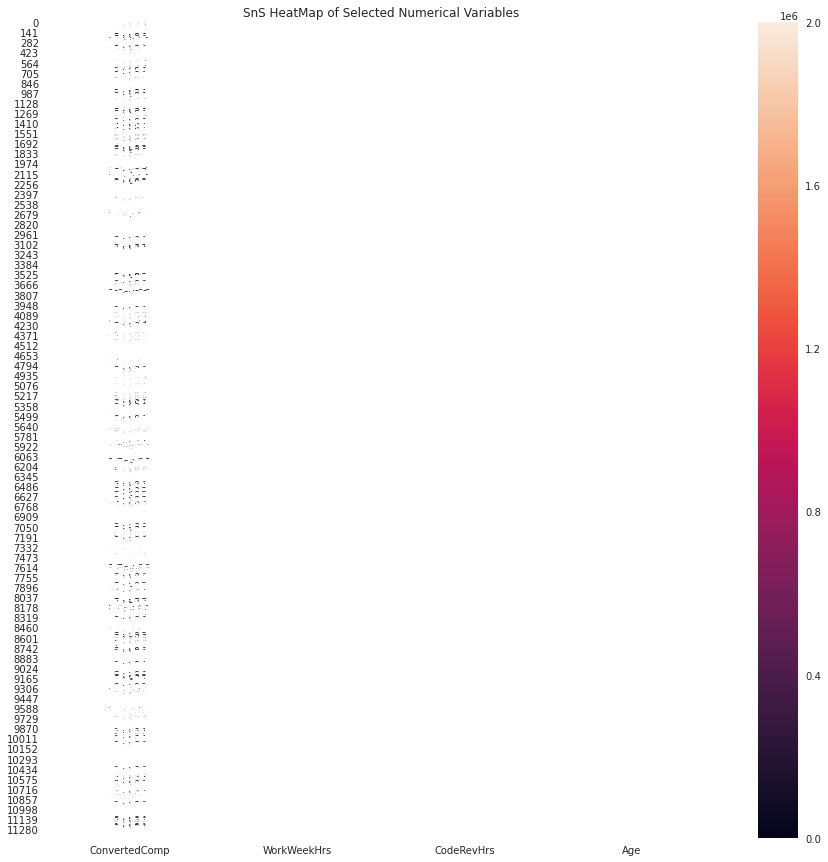

In [225]:
# Correlation Using HeatMap - Not Displayed Properly
#Import Modules
# https://www.geeksforgeeks.org/python-pandas-dataframe-groupby/

import matplotlib.pylab as plt
plt.style.use("seaborn")
 
z = df[['ConvertedComp', 'WorkWeekHrs', 'CodeRevHrs', 'Age']]

# Plot the heatmap
plt.figure(figsize=(15,15))
heat_map = sns.heatmap(z, linewidth=2.3, annot=True)
plt.title( "SnS HeatMap of Selected Numerical Variables" )
plt.show()


In [ ]:
# Get Distinct DevType values for Lab Responses

QUERY = """
Select ConvertedComp, Age from master
order by Age
"""

qryCorr = pd.read_sql_query(QUERY, conn)
qryCorr


In [ ]:
#  Replacing nan values in AGE Column

#qryStkChrt.set_index(['WorkWeekHrs'])

if qryCorr['Age'].isnull().sum() > 0:
    meanAge = qryStkChrt['Age'].mean()
    qryCorr['Age'] = qryCorr['Age'].fillna(meanAge)
    
if qryCorr['ConvertedComp'].isnull().sum() > 0:
    meanWork = qryCorr['ConvertedComp'].mean()
    qryCorr['ConvertedComp'] = qryCorr['ConvertedComp'].fillna(meanWork)


In [220]:
#Pearson Correlation check

import scipy
from scipy import stats
pearson_coeff, p_value=stats.pearsonr(qryHeat['ConvertedComp'], qryHeat['Age'])
                                         

In [221]:
print('Pearson Correlation {1:.2f}%'.format(pearson_coeff))

IndexError: tuple index out of range

In [222]:
print('p-value is {1:.2f}%'.format(p_value))

IndexError: tuple index out of range

### BARCHART: TOP 5 CURRENT YEAR LANGUAGES

Text(0, 0.5, 'Language Worked WithFreqency')

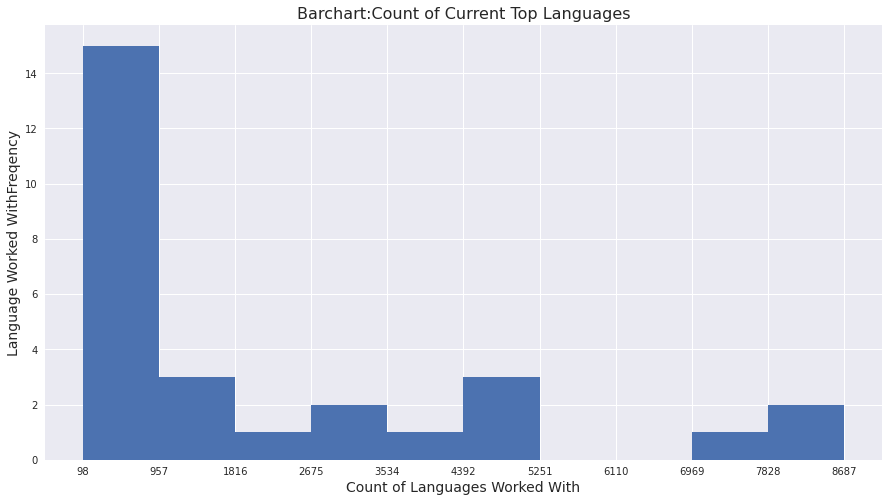

In [232]:
#  Concept from Week 2 - HISTOGRAMS - Show distribution of converted salaries

count, bin_edges = np.histogram(dfCurrLang['cntLang'].dropna())
plt.figure(figsize=(15, 8), edgecolor='blue')
dfCurrLang["cntLang"].plot(kind = 'hist', xticks=bin_edges)

#plt.figure(figsize=(15, 8), edgecolor='blue')
plt.title("Barchart:Count of Current Top Languages", size=16)
plt.xlabel("Count of Languages Worked With", size=14)
plt.ylabel("Language Worked WithFreqency", size=14)

#plt.show()

In [ ]:
# Working Code
"""
plt.figure(figsize=(14, 8), edgecolor='blue')
plt.hist(dfCurrLang['cntLang'], density=True, bins=10) # density=False would make counts
plt.title('Converted Comp Distribution')
plt.ylabel('Freq Count')
plt.xlabel('Count of Current Langs)')
"""

### BARCHART: TOP 5 FUTURE (Next Year) LANGUAGES

Text(0, 0.5, 'Future Language Freqency')

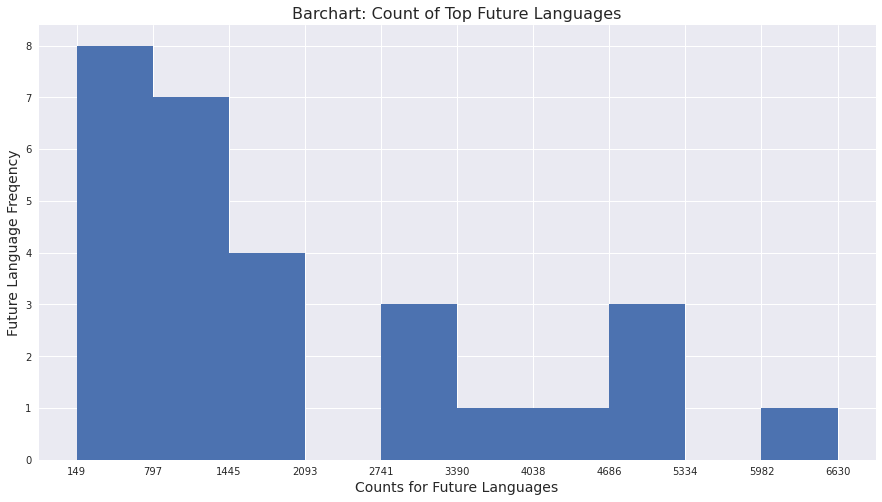

In [233]:
#  Concept from Week 2 - HISTOGRAMS - Show distribution of converted salaries

count, bin_edges = np.histogram(dfFutLang['cntLang'].dropna())
plt.figure(figsize=(15, 8), edgecolor='blue')
dfFutLang["cntLang"].plot(kind = 'hist', xticks=bin_edges)

#plt.figure(figsize=(15, 8), edgecolor='blue')
plt.title("Barchart: Count of Top Future Languages", size=16)
plt.xlabel("Counts for Future Languages", size=14)
plt.ylabel("Future Language Freqency", size=14)

#plt.show()

### BARCHART: TOP 5 Current DATABASES

Text(0, 0.5, 'Database Count Freqency')

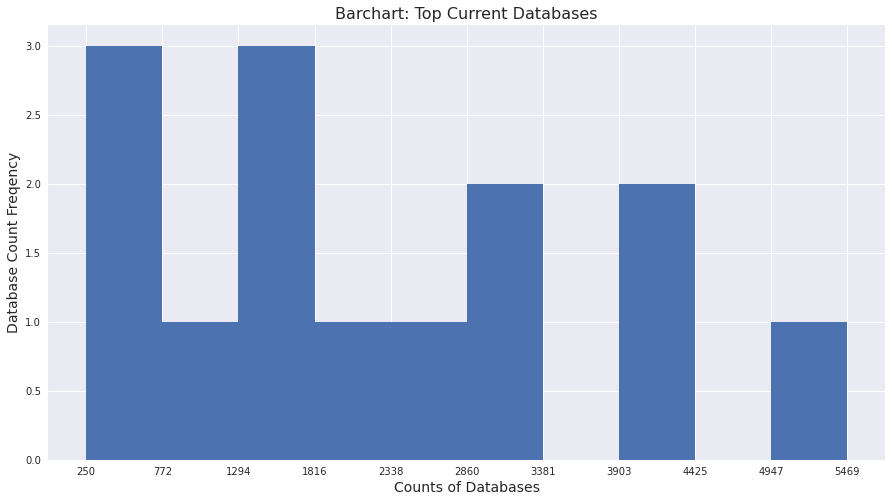

In [234]:
#  Concept from Week 2 - HISTOGRAMS - Show distribution of converted salaries

count, bin_edges = np.histogram(dfCurrDB['cntDB'].dropna())
plt.figure(figsize=(15, 8), edgecolor='blue')
dfCurrDB["cntDB"].plot(kind = 'hist', xticks=bin_edges)

#plt.figure(figsize=(15, 8), edgecolor='blue')
plt.title("Barchart: Top Current Databases", size=16)
plt.xlabel("Counts of Databases", size=14)
plt.ylabel("Database Count Freqency", size=14)

#plt.show()

### BARCHART: TOP 5 Future DATABASES

Text(0, 0.5, 'Count Future Database Freqency')

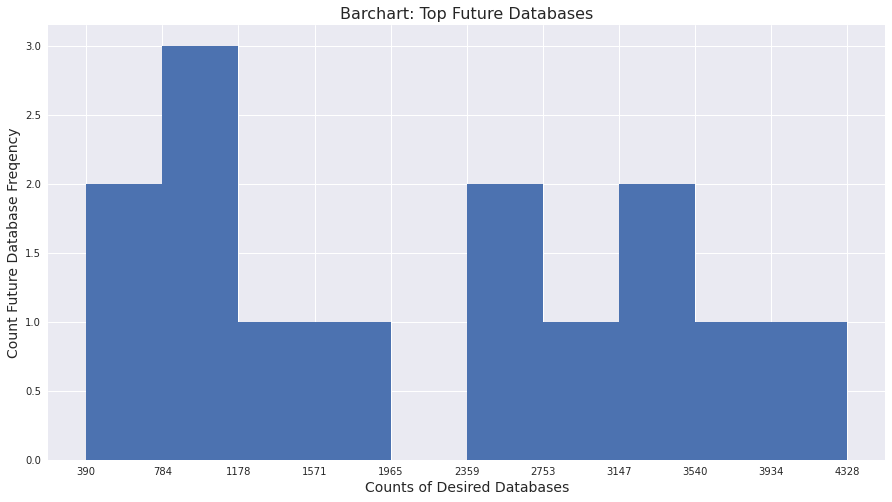

In [236]:
#  Concept from Week 2 - HISTOGRAMS - Show distribution of Database Desired

count, bin_edges = np.histogram(dfFutDB['cntDB'].dropna())
plt.figure(figsize=(15, 8), edgecolor='blue')
dfFutDB["cntDB"].plot(kind = 'hist', xticks=bin_edges)

#plt.figure(figsize=(15, 8), edgecolor='blue')
plt.title("Barchart: Top Future Databases", size=16)
plt.xlabel("Counts of Desired Databases", size=14)
plt.ylabel("Count Future Database Freqency", size=14)

#plt.show()

Close the database connection.


In [ ]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja
Helena Rolle

## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
